In [1]:
%load_ext autoreload
%autoreload 2

# Building Action Spaces

In the base implementation, the actions of the agent are all learned. Meaning, the RL agent has to learn which of the 4 possible actions to choose from for all 22 possible joints. This puts a burden on the learning stack and limits the agent's ability to learn. One way we can offset that is by building action spaces that are linear. Essentially, instead of trying to learn which of the $4^{22}$ possible configurations is the best to deploy, we can significantly limit the number of possible actions. Here we demonstrate a few different ways to pick actions. These are all methods that can be found in `utils.action_space.action_space`. There, we can also find a method to view all actions chosen by a given method!

In [7]:
# some useful libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("..")
plt.style.use("ggplot")

from scipy import stats
from collections import Counter
from utils.tools import *
from utils.viz_tools import visuals
from utils.action_space import action_space, watch_actions

In [3]:
# some useful data to have loaded
df = load_csv("../data/player1_state_info.csv")
vis = visuals("../data/player1_state_info.csv")

In [4]:
builder = action_space("../data/player1_state_info.csv")

## Random Actions:

This builds a dictionary of N random action arrays. This serves as a baseline for testing against other action spaces. 

In [5]:
random_actions = builder.random_actions(10)
random_actions

{0: [3, 4, 2, 2, 4, 2, 1, 1, 1, 1, 1, 4, 1, 3, 1, 2, 2, 3, 4, 1, 2, 3],
 1: [4, 4, 3, 4, 3, 3, 3, 1, 2, 3, 4, 2, 1, 4, 4, 4, 2, 2, 1, 4, 2, 1],
 2: [1, 3, 1, 1, 3, 1, 2, 2, 2, 2, 4, 4, 2, 1, 2, 2, 4, 1, 3, 2, 2, 2],
 3: [1, 4, 3, 4, 4, 1, 2, 3, 4, 2, 3, 4, 2, 4, 2, 3, 1, 4, 3, 4, 3, 3],
 4: [1, 1, 2, 3, 2, 1, 3, 3, 4, 4, 2, 4, 2, 1, 3, 4, 4, 3, 4, 4, 4, 3],
 5: [3, 3, 4, 1, 1, 2, 1, 2, 1, 4, 2, 4, 3, 1, 4, 2, 1, 2, 3, 4, 4, 4],
 6: [3, 4, 4, 4, 1, 3, 3, 2, 4, 2, 3, 3, 4, 4, 1, 2, 3, 4, 4, 1, 1, 4],
 7: [2, 3, 4, 1, 2, 3, 4, 1, 4, 3, 1, 4, 3, 1, 1, 1, 2, 3, 3, 4, 1, 2],
 8: [2, 2, 4, 4, 3, 3, 4, 2, 1, 3, 2, 3, 2, 3, 2, 1, 1, 4, 1, 1, 1, 1],
 9: [3, 2, 4, 3, 4, 3, 2, 4, 4, 4, 2, 1, 3, 2, 2, 3, 4, 2, 3, 4, 2, 4]}

In [ ]:
watch_actions(random_actions, pause=3)

## Frequency

One possible way to gather information about possible actions is to just pick the N most actions 

In [39]:
freq_actions = builder.frequency_builder(10)
freq_actions

{0: [3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3],
 1: [4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4],
 2: [3, 2, 3, 4, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3, 4, 1, 2, 2, 3, 3, 3, 3],
 3: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 4: [2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 3, 4, 4, 4],
 5: [1, 2, 1, 1, 4, 2, 3, 3, 1, 1, 4, 1, 1, 4, 4, 1, 2, 3, 3, 2, 3, 4],
 6: [4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4],
 7: [1, 3, 2, 2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 1, 1],
 8: [1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 4, 4, 3],
 9: [3, 3, 4, 4, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3]}

In [ ]:
watch_actions(freq_actions)

## Temporally Weighted Frequency

While this is a useful technique for getting some actions, what we end up getting is a good list of starting moves. Because the first move is very similar among many different matches, the most frequent matches are going to be the ones done the earliest. To help aleviate this, let's weight the frequency of a move by its count and by how far into the match it is played. Futhermore, let's weight moves near the center of the match to get interesting actions to learn from!

In [38]:
time_actions = builder.temporal_frequency_builder(10)
time_actions

{0: [3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3],
 1: [3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3],
 2: [3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 3: [3, 2, 3, 3, 4, 3, 3, 4, 1, 4, 3, 2, 3, 3, 4, 3, 3, 2, 3, 2, 2, 2],
 4: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 1, 4, 4],
 5: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3],
 6: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 2],
 7: [3, 3, 1, 4, 3, 3, 4, 3, 3, 4, 3, 1, 3, 1, 4, 4, 3, 4, 4, 3, 1, 3],
 8: [3, 3, 2, 4, 2, 3, 4, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 4, 4, 2, 1, 4],
 9: [3, 3, 2, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 4, 2, 1, 2]}

In [41]:
watch_actions(time_actions, pause=3)

## Gridded Actions
While the previous 3 methods are discrete and simplify the action space, we can maybe learn the entire action space by changing the domain we are working in. Rather than trying to rank all possible actions or regress to a specific action, let's try to condense the action space to a grid. 

This action space uses two continuous inputs and bins these values on a 2D grid. Based on which bin the (x,y) point falls in determines what action the agent takes. The plot below shows what it would look like if the agent model outputs the coordinate (4.75, 6.8). This lands the point in bin 75 and therefore take the 75th action. If this is a list of 100 possible actions, then just take the 75th action. 

Text(5,7.5,'(4.75, 6.8)')

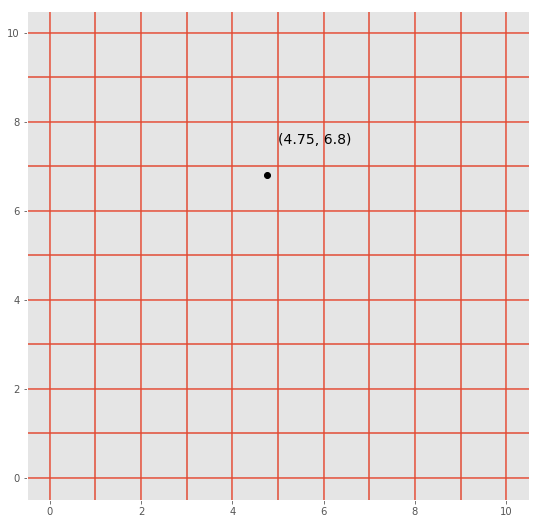

In [18]:
plt.figure(figsize=(9,9))
for i in range(11):
    plt.axhline(y=i)
    plt.axvline(x=i)
plt.plot(4.75, 6.8, 'ko')
plt.text(5, 7.5, "(4.75, 6.8)",fontsize=14)

Because we are dealing with particularly large values, we don't want to iterate through all possible permutations every single time. Thus we first calculate the bin number using action_space.bin_val(x,y,T) and change that value into base 4 and use that value to create a new action array. Let's take a look at an example by assuming we were in bin 10000! 

In [26]:
base_10 = 10000
base_4 = np.base_repr(base_10, base=4)
tmp = [int(c) + 1 for c in base_4]
print("The decimal value {} in base 4 is {}".format(base_10, base_4))
print("If we split up the base_4 value by ints (and add one to get appropriate input), then we get {}".format(tmp))

The decimal value 10000 in base 4 is 2130100
If we split up the base_4 value by ints (and add one to get appropriate input), then we get [3, 2, 4, 1, 2, 1, 1]


In [22]:
print("Because our action array must be a 22 vector, then we can use some simple Python list manipulation to get a useful array. Let's assume [3] is our dummy value. \n", tmp + [3]*(22 - len(tmp)))

Because our action array must be a 22 vector, then we can use some simple Python list manipulation to get a useful array. Let's assume [3] is our dummy value. 
 [3, 2, 4, 1, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


Now we've gone from just 2 continuous values to a 22 vector that can be used in the environment without iterating through 10,000 permutations.